In [1]:
# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
# indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor1"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_simpleUnion_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_simpleUnion/donor1"
outdir = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_simpleUnion_knn_resolution_30/clonalShift_method_clones/top"
clone_order_f = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_simpleUnion_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"


ntop_clones = -1 #unused parameters

af_thresh = 0.001
cov_thresh = 2
ntop_vars=10

remove_donor_vars = True

In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order #clone_order[:ntop_clones]
top_clones

array(['1_60', '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7',
       '1_8', '1_9', '1_10', '1_11', '1_12', '1_13', '1_45', '1_51',
       '1_55', '1_14', '1_38', '1_15', '1_23', '1_44', '1_16', '1_57',
       '1_19', '1_17', '1_54', '1_18', '1_39', '1_62', '1_49', '1_24',
       '1_20', '1_21', '1_22', '1_26', '1_31', '1_52', '1_28', '1_27',
       '1_42', '1_25', '1_48', '1_30', '1_29', '1_56', '1_40', '1_34',
       '1_36', '1_35', '1_33', '1_32', '1_43', '1_50', '1_61', '1_58',
       '1_37', '1_47', '1_46', '1_41', '1_59', '1_53'], dtype=object)

In [5]:
clone_order

array(['1_60', '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7',
       '1_8', '1_9', '1_10', '1_11', '1_12', '1_13', '1_45', '1_51',
       '1_55', '1_14', '1_38', '1_15', '1_23', '1_44', '1_16', '1_57',
       '1_19', '1_17', '1_54', '1_18', '1_39', '1_62', '1_49', '1_24',
       '1_20', '1_21', '1_22', '1_26', '1_31', '1_52', '1_28', '1_27',
       '1_42', '1_25', '1_48', '1_30', '1_29', '1_56', '1_40', '1_34',
       '1_36', '1_35', '1_33', '1_32', '1_43', '1_50', '1_61', '1_58',
       '1_37', '1_47', '1_46', '1_41', '1_59', '1_53'], dtype=object)

In [6]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [7]:
#donor_vars = AF_df>0.9

In [8]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGAGCTCCC-1_Flt3l,1_33,5,Flt3l,1
AAACGAACATTAAGGA-1_Flt3l,1_60,8,Flt3l,1
AAACGAATCAAGTTGC-1_Flt3l,1_60,6,Flt3l,1
AAACTCGCAAGCCCTG-1_Flt3l,1_20,7,Flt3l,1
AAACTCGCATCCCTCA-1_Flt3l,1_6,8,Flt3l,1
...,...,...,...,...
TTTGTGTCACGCCGAT-1_Flt3l,1_2,3,Flt3l,1
TTTGTGTCACTACACA-1_Flt3l,1_1,5,Flt3l,1
TTTGTGTGTATACGCT-1_Flt3l,1_57,6,Flt3l,1
TTTGTGTGTATCTCAG-1_Flt3l,1_1,4,Flt3l,1


## Get donor-specific variants

In [9]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")


number of donor vars: 41


## Filter for clone

In [10]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [11]:
AF_df.head()

Cell,AAACGAAAGAGCTCCC-1_Flt3l,AAACGAACATTAAGGA-1_Flt3l,AAACGAATCAAGTTGC-1_Flt3l,AAACTCGCAAGCCCTG-1_Flt3l,AAACTCGCATCCCTCA-1_Flt3l,AAACTGCCAAGGGTAC-1_Flt3l,AAACTGCCAGCGTCGT-1_Flt3l,AAACTGCGTTTCCGGG-1_Flt3l,AAACTGCTCTATCTCA-1_Flt3l,AAAGATGCACCCTTAC-1_Flt3l,...,TTTGGTTTCCTAGAGT-1_Flt3l,TTTGTGTAGAGAACCC-1_Flt3l,TTTGTGTAGAGGTCCA-1_Flt3l,TTTGTGTAGCGTCAAG-1_Flt3l,TTTGTGTAGGAGTCTG-1_Flt3l,TTTGTGTCACGCCGAT-1_Flt3l,TTTGTGTCACTACACA-1_Flt3l,TTTGTGTGTATACGCT-1_Flt3l,TTTGTGTGTATCTCAG-1_Flt3l,TTTGTGTTCGAGTTAC-1_Flt3l
16278T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15784C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13625T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14985A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13305T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Remove donor-specific variants

In [12]:
if remove_donor_vars:
    # Remove Donor variannts
    AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
    DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [13]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGAGCTCCC-1_Flt3l,1_33,5,Flt3l,1
AAACGAACATTAAGGA-1_Flt3l,1_60,8,Flt3l,1
AAACGAATCAAGTTGC-1_Flt3l,1_60,6,Flt3l,1
AAACTCGCAAGCCCTG-1_Flt3l,1_20,7,Flt3l,1
AAACTCGCATCCCTCA-1_Flt3l,1_6,8,Flt3l,1
...,...,...,...,...
TTTGTGTCACGCCGAT-1_Flt3l,1_2,3,Flt3l,1
TTTGTGTCACTACACA-1_Flt3l,1_1,5,Flt3l,1
TTTGTGTGTATACGCT-1_Flt3l,1_57,6,Flt3l,1
TTTGTGTGTATCTCAG-1_Flt3l,1_1,4,Flt3l,1


In [14]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

Cell,AAACGAAAGAGCTCCC-1_Flt3l,AAACGAACATTAAGGA-1_Flt3l,AAACGAATCAAGTTGC-1_Flt3l,AAACTCGCAAGCCCTG-1_Flt3l,AAACTCGCATCCCTCA-1_Flt3l,AAACTGCCAAGGGTAC-1_Flt3l,AAACTGCCAGCGTCGT-1_Flt3l,AAACTGCGTTTCCGGG-1_Flt3l,AAACTGCTCTATCTCA-1_Flt3l,AAAGATGCACCCTTAC-1_Flt3l,...,TTTGGTTTCCTAGAGT-1_Flt3l,TTTGTGTAGAGAACCC-1_Flt3l,TTTGTGTAGAGGTCCA-1_Flt3l,TTTGTGTAGCGTCAAG-1_Flt3l,TTTGTGTAGGAGTCTG-1_Flt3l,TTTGTGTCACGCCGAT-1_Flt3l,TTTGTGTCACTACACA-1_Flt3l,TTTGTGTGTATACGCT-1_Flt3l,TTTGTGTGTATCTCAG-1_Flt3l,TTTGTGTTCGAGTTAC-1_Flt3l
16278T,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
15784C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13625T,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14985A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13305T,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983T,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16512A,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
8908A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513A,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [15]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = 100*curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = 100*other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,1_0,16278T,9.050773,13.429368
1,1_0,15784C,0.220751,0.743494
2,1_0,13625T,5.298013,2.602230
3,1_0,14985A,1.103753,1.022305
4,1_0,13305T,2.869757,1.719331
...,...,...,...,...
16753,1_9,983T,0.000000,2.417154
16754,1_9,16512A,2.500000,3.547758
16755,1_9,8908A,0.000000,2.884990
16756,1_9,513A,7.500000,7.095517


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [16]:
from scipy.stats import mannwhitneyu

In [17]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:,clone_cells.index].fillna(0)
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))].fillna(0)
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,1_0,16278T,263,0.997776
1,1_0,15784C,245,0.895603
2,1_0,13625T,12,0.001529
3,1_0,14985A,183,0.438816
4,1_0,13305T,79,0.054794
...,...,...,...,...
16753,1_9,983T,210,0.840210
16754,1_9,16512A,119,0.645054
16755,1_9,8908A,228,0.862108
16756,1_9,513A,71,0.433781


In [18]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,1_0,16278T,9.050773,13.429368,263,0.997776
1,1_0,15784C,0.220751,0.743494,245,0.895603
2,1_0,13625T,5.298013,2.602230,12,0.001529
3,1_0,14985A,1.103753,1.022305,183,0.438816
4,1_0,13305T,2.869757,1.719331,79,0.054794
...,...,...,...,...,...,...
16753,1_9,983T,0.000000,2.417154,210,0.840210
16754,1_9,16512A,2.500000,3.547758,119,0.645054
16755,1_9,8908A,0.000000,2.884990,228,0.862108
16756,1_9,513A,7.500000,7.095517,71,0.433781


In [19]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("% cells with variant")
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("(% cells in clone with variant) - (%cells not in clone with variant)")
    #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

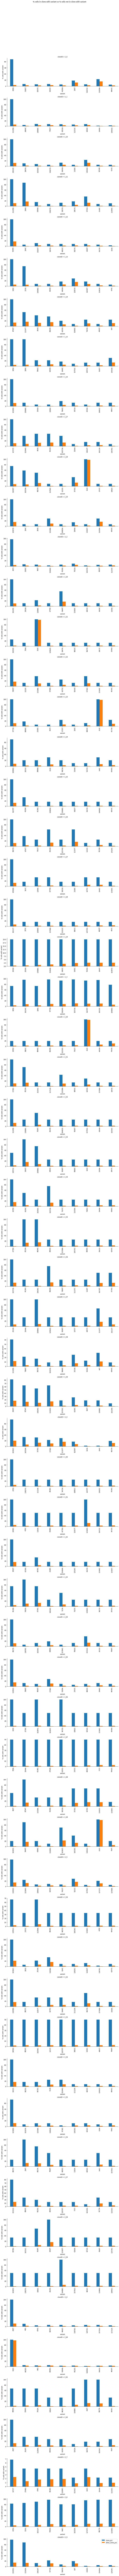

In [20]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=3,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle("% cells in clone with variant vs % cells not in clone with variant", y=1.02)
#g.fig.savefig(fname=join(outdir, f"all_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"all_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.tight_layout()
plt.legend()

In [21]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    print(curr_merge_df.head())
    if ntop_vars != 0:
        print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    

# Plot variants as row and clone as x AF violin

In [22]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

In [23]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
248G      0.007519
11002G    0.007722
16362C    0.007812
11149A    0.007874
16519C    0.007968
            ...   
13463A    0.150000
16131C    0.164179
6028A     0.186667
12811G    0.225806
523C      0.350877
Length: 266, dtype: float64

In [24]:
print(len(vars_order))
vars_order = [x for x in vars_order if x in long_af["Variant"].values]
print(len(vars_order))
vars_order

266
266


['248G',
 '11002G',
 '16362C',
 '11149A',
 '16519C',
 '290T',
 '287C',
 '16124C',
 '14560A',
 '10086G',
 '5773A',
 '16290T',
 '16111T',
 '146C',
 '2514A',
 '185A',
 '13105G',
 '8794T',
 '12727C',
 '235G',
 '1040C',
 '10373A',
 '8118A',
 '11838A',
 '3278C',
 '12160G',
 '15311G',
 '14971C',
 '16278T',
 '4806A',
 '1736G',
 '8027A',
 '3450T',
 '9449T',
 '13951C',
 '16319A',
 '153G',
 '189G',
 '1471T',
 '6109C',
 '3395C',
 '983T',
 '9340G',
 '634C',
 '6432G',
 '10254C',
 '6797T',
 '5585T',
 '13145A',
 '15824G',
 '6221C',
 '49G',
 '4100A',
 '7639T',
 '4248C',
 '11204A',
 '6050G',
 '7032A',
 '7808T',
 '6470C',
 '8843C',
 '6890G',
 '7842C',
 '3837G',
 '14808C',
 '2031G',
 '7403G',
 '15244G',
 '3672G',
 '3801C',
 '8152A',
 '513A',
 '14614T',
 '13625T',
 '13108A',
 '7849T',
 '6980G',
 '6207G',
 '12007A',
 '11657T',
 '13339A',
 '8832C',
 '6275C',
 '5978G',
 '8908A',
 '8595G',
 '310C',
 '6432C',
 '6293G',
 '7361T',
 '16387G',
 '6293C',
 '6456A',
 '14488C',
 '3735T',
 '1847A',
 '9523G',
 '4844G',
 

In [26]:
len(vars_order)

266

In [27]:
# try:
#     g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#                 sharey=False, col_order=vars_order,
#                 height=4, aspect=2, order=top_clones)
#     g.fig.savefig(fname=join(outdir, f"all_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
# except ValueError as e:
nvars = len(vars_order)
nfigs = int(np.round(nvars/16))
out_fs = []
for curr_f in range(nfigs):
    end_ind = min((curr_f+1)*16, nvars)
    curr_vars = vars_order[(curr_f*16):end_ind]
    print('curr_vars', len(curr_vars), curr_vars)
    curr_file = join(outdir, f"all_variants_{curr_f+1}_{(end_ind+1)}_af.svg")
    g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
                sharey=False, col_order=curr_vars,
                order=top_clones, height=2, aspect=2)
    g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
    out_fs.append(curr_file)
    plt.close()
cmd = f"svg_stack.py --direction=h --margin=100 {' '.join(out_fs)} > {join(outdir, 'all_variants_af.svg')}"
print(cmd)
os.system(cmd)
    #!{cmd}

    #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


curr_vars 16 ['248G', '11002G', '16362C', '11149A', '16519C', '290T', '287C', '16124C', '14560A', '10086G', '5773A', '16290T', '16111T', '146C', '2514A', '185A']
curr_vars 16 ['13105G', '8794T', '12727C', '235G', '1040C', '10373A', '8118A', '11838A', '3278C', '12160G', '15311G', '14971C', '16278T', '4806A', '1736G', '8027A']
curr_vars 16 ['3450T', '9449T', '13951C', '16319A', '153G', '189G', '1471T', '6109C', '3395C', '983T', '9340G', '634C', '6432G', '10254C', '6797T', '5585T']
curr_vars 16 ['13145A', '15824G', '6221C', '49G', '4100A', '7639T', '4248C', '11204A', '6050G', '7032A', '7808T', '6470C', '8843C', '6890G', '7842C', '3837G']
curr_vars 16 ['14808C', '2031G', '7403G', '15244G', '3672G', '3801C', '8152A', '513A', '14614T', '13625T', '13108A', '7849T', '6980G', '6207G', '12007A', '11657T']
curr_vars 16 ['13339A', '8832C', '6275C', '5978G', '8908A', '8595G', '310C', '6432C', '6293G', '7361T', '16387G', '6293C', '6456A', '14488C', '3735T', '1847A']
curr_vars 16 ['9523G', '4844G', '

0

In [28]:
outdir

'/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_simpleUnion_knn_resolution_30/clonalShift_method_clones/top'

## Overlapping variants across clones